Visualize benchmark results
---
We've benchmarked moslin (and variants that only use gene expression or lineage tracing information) with [LineageOT](https://doi.org/10.1038/s41467-021-25133-1) on the C. elegans data and visualize the results here. 

# Preliminaries

## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Literal, Optional
import sys
import numpy as np

import utils

## Set up paths

Define the paths for data and figures. 

In [2]:
sys.path.insert(
    0, "../../"
)  # this depends on the notebook depth and must be adapted per notebook

from paths import DATA_DIR, FIG_DIR

FIG_DIR = FIG_DIR / "packer_c_elegans"
DATA_DIR = DATA_DIR / "packer_c_elegans"

## Set global parameters

In [3]:
DPI_SAVE = 400

# should figures just be displayed or also saved?
save_figure = False
save_table = True

## Import the data

In [4]:
runs_df = pd.read_csv(DATA_DIR / "ML_2024-03-11_celegans_precise_and_abpxp.csv", index_col=0)
runs_df.head()

,_wandb,late_cost,early_cost,deviation_from_balanced,_step,_runtime,converged,_timestamp,mean_error,tp,kind,alpha,tau_a,epsilon,scale_cost,lineage_info,max_inner_iterations,name
0,{'runtime': 39},0.999760,0.999754,2.220446e-16,0,40.387466,True,1.699616e+09,0.999757,450-510,GW,1.0,1,0.5,mean,abpxp,30000.0,eternal-sweep-600
1,{'runtime': 73},0.999836,0.999860,0.000000e+00,0,73.671219,True,1.699616e+09,0.999848,390-450,GW,1.0,1,0.5,mean,abpxp,30000.0,sleek-sweep-599
2,{'runtime': 369},0.999639,0.999686,0.000000e+00,0,370.097028,True,1.699616e+09,0.999662,330-390,GW,1.0,1,0.5,mean,abpxp,30000.0,giddy-sweep-598
3,{'runtime': 1269},0.999912,0.999899,6.661338e-16,0,1270.005563,True,1.699617e+09,0.999905,270-330,GW,1.0,1,0.5,mean,abpxp,30000.0,skilled-sweep-597
4,{'runtime': 306},0.999962,0.999964,2.220446e-16,0,307.494087,True,1.699616e+09,0.999963,210-270,GW,1.0,1,0.5,mean,abpxp,30000.0,iconic-sweep-596


Reorder categories. 

In [5]:
runs_df['kind'] = runs_df['kind'].astype('category').cat.reorder_categories(['LineageOT', 'OT', 'GW', 'moslin'])

## Define utility functions

In [6]:
def plot(
    df: pd.DataFrame,
    lineage_info: Literal["precise", "abpxp"],
    metric: str = "mean_error",
    aim: Literal["min", "max"] = "min",
    group_key: str = "kind",
    convergence_key: str = "converged",
    converged: Optional[bool] = None,
    alpha_min: Optional[float] = None,
    save: Optional[str] = None
):

    # filter to the best performing runs
    df = utils.get_best_runs(
        df=df,
        lineage_info=lineage_info,
        metric=metric,
        aim=aim,
        group_key=group_key,
        convergence_key=convergence_key,
        converged=converged,
        alpha_min=alpha_min,
    )

    # print the best-performing runs
    print(
        df[
            [
                "alpha",
                "kind",
                "tp",
                "epsilon",
                "scale_cost",
                "mean_error"
            ]
        ]
    )

    # plot
    fig, ax = plt.subplots(dpi=400)
    _ = sns.barplot(
        df,
        x="tp",
        y="mean_error",
        hue="kind",
        ax=ax,
        palette=["#40928A", "#85BCD9", "#1A5A29", "#C8AB66"],
    )
    ax.set_title(lineage_info)
    ax.set_xlabel("time point")
    ax.set_ylabel("mean error")
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    ax.set_axisbelow(True)
    ax.yaxis.grid(True)
    if save is not None:
        fig.savefig(FIG_DIR / save, bbox_inches="tight")

# Visualize the results

Show our results and hyperparameters on the subset of cells with precise lineage information.

Removing 19/330 not converged runs.
     alpha       kind       tp  epsilon scale_cost  mean_error
647    NaN  LineageOT  170-210    0.010       mean    0.332473
634    NaN  LineageOT  210-270    0.050       mean    0.316382
633    NaN  LineageOT  270-330    0.050       mean    0.267600
643    NaN  LineageOT  330-390    0.010       mean    0.233266
631    NaN  LineageOT  390-450    0.050       mean    0.138912
618    NaN  LineageOT  450-510    0.100       mean    0.137876
563   0.00         OT  170-210    0.100       mean    0.436702
573   0.00         OT  210-270    0.050       mean    0.438561
574   0.00         OT  270-330    0.050       mean    0.348652
572   0.00         OT  330-390    0.050       mean    0.267483
571   0.00         OT  390-450    0.050       mean    0.169568
558   0.00         OT  450-510    0.100       mean    0.155998
47    1.00         GW  170-210    0.010       mean    0.096471
58    1.00         GW  210-270    0.001       mean    0.157038
57    1.00         

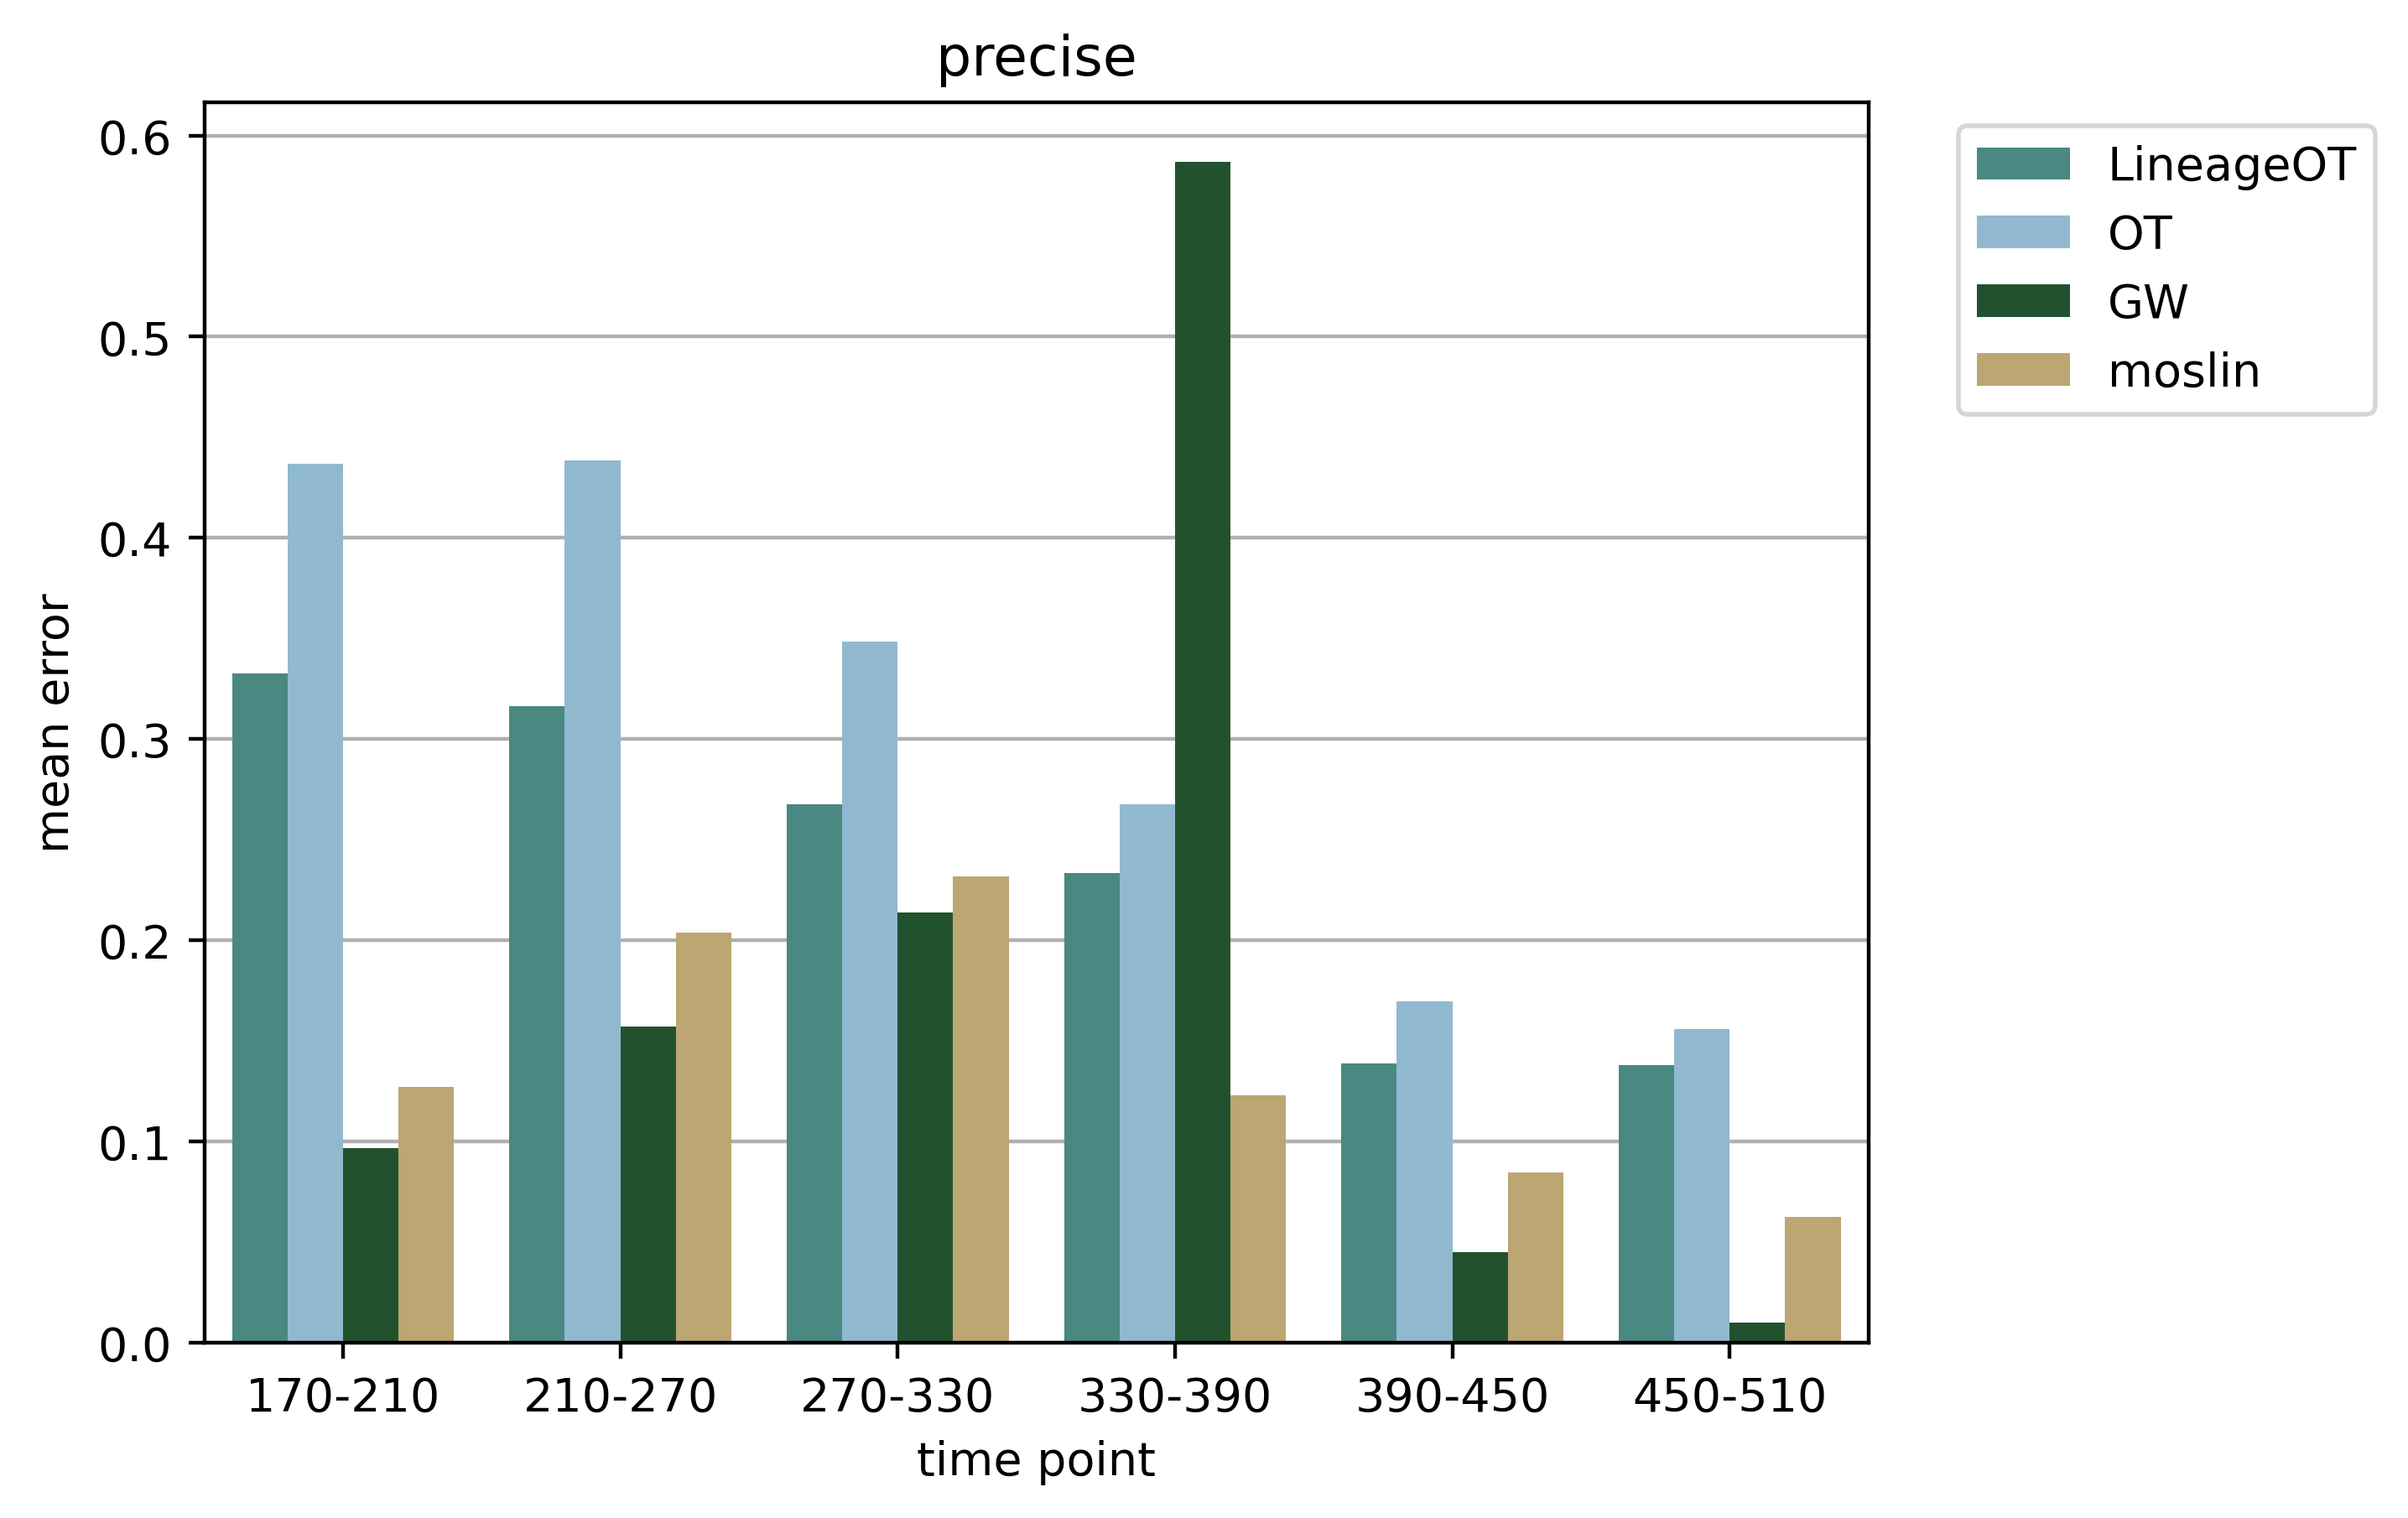

In [7]:
fig_kwargs = {"lineage_info": "precise", "converged": True}
if save_figure:
    fig_kwargs["save"] = "bar_benchmark_precise.pdf"

plot(runs_df, **fig_kwargs)

Show our results and hyperparameters on the ABpxp lineage.

Removing 12/330 not converged runs.
     alpha       kind       tp  epsilon scale_cost  mean_error
629    NaN  LineageOT  170-210    0.050       mean    0.760436
628    NaN  LineageOT  210-270    0.050       mean    0.534925
627    NaN  LineageOT  270-330    0.050       mean    0.399667
626    NaN  LineageOT  330-390    0.050       mean    0.568237
625    NaN  LineageOT  390-450    0.050       mean    0.286609
624    NaN  LineageOT  450-510    0.050       mean    0.201518
545   0.00         OT  170-210    0.500       mean    0.970943
556   0.00         OT  210-270    0.100       mean    0.719254
567   0.00         OT  270-330    0.050       mean    0.489825
566   0.00         OT  330-390    0.050       mean    0.623947
565   0.00         OT  390-450    0.050       mean    0.315022
552   0.00         OT  450-510    0.100       mean    0.236753
41    1.00         GW  170-210    0.010       mean    0.728826
52    1.00         GW  210-270    0.001       mean    0.550579
51    1.00         

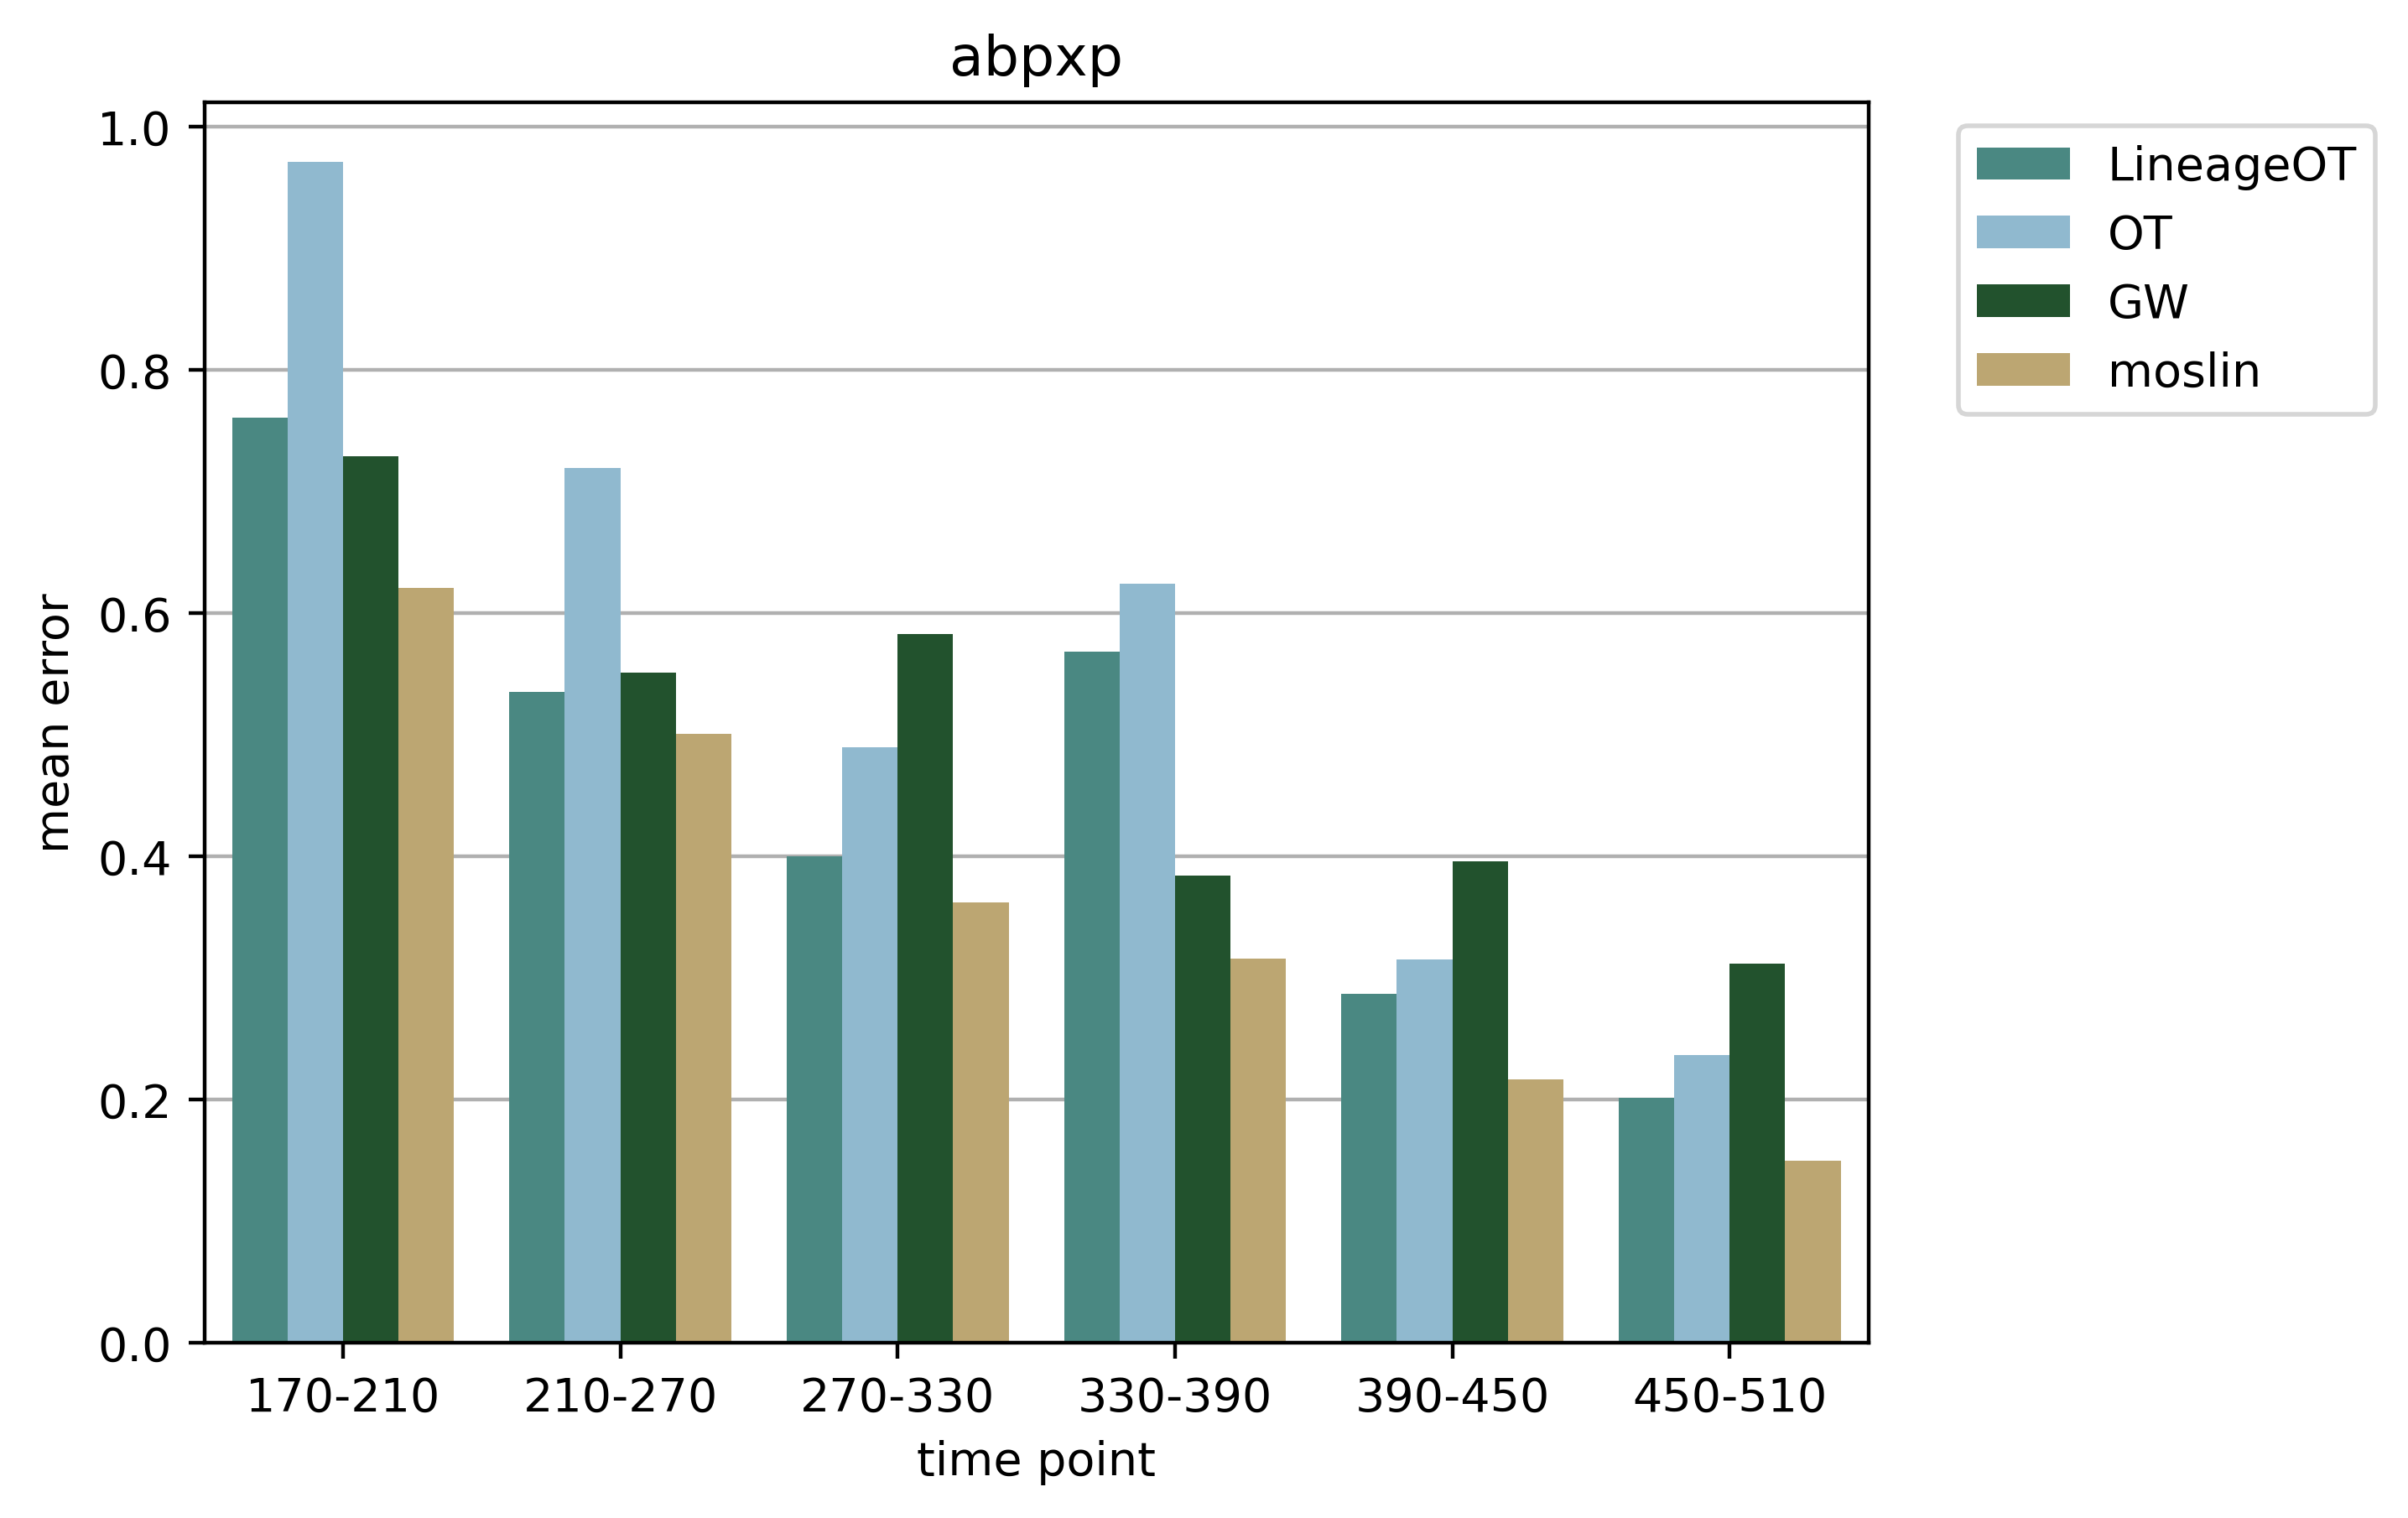

In [8]:
fig_kwargs = {"lineage_info": "abpxp", "converged": True}
if save_figure:
    fig_kwargs["save"] = "bar_benchmark_abpxp.pdf"

plot(runs_df, **fig_kwargs)